---

In [1]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
import locale
import os
import os.path as osp
from typing import List, Dict, Set, Callable
from mpl_toolkits.axes_grid1 import make_axes_locatable


HOME = "../../"
DATA = osp.join(HOME, "data")
CODE = osp.join(HOME, "code")
GREENSPACE_DATA = osp.join(DATA, "greenspace_data")
CENSUS_DATA = osp.join(DATA, "census_code_mappers")
STATES = geopandas.read_file('./state_shape_data/usa-states-census-2014.shp')
STATES.crs
STATES = STATES.to_crs("EPSG:3395")

CLEAN_DATA = osp.join(HOME, "clean_data")
CLEAN_GREENSPACE_DATA = osp.join(CLEAN_DATA, "greenspace_data")

In [9]:
def plot_on_US_map(
    fnc: Callable[[pd.Series], int], 
    col_name: str
):

    fig, ax = plt.subplots(1, 1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    STATES[col_name] = STATES.apply(fnc, axis = 1)
    STATES.plot(column = col_name, ax=ax, legend = True, cax=cax)
    plt.title("How "+str(col_name)+" varies by state")
    plt.show()

Getting all the locational dataframes

In [4]:
city_df = pd.read_csv(osp.join(CENSUS_DATA, "us_city_info.csv"))
blocks_df = pd.read_csv(osp.join(CENSUS_DATA, "us_blocks.csv"))
fips_df = pd.read_csv(osp.join(CENSUS_DATA, "fips_codes.csv"))

# Getting some dictionaries from the blocks_df
dc_block_geo_id_state_fip = dict(zip(blocks_df.block_geoid, blocks_df.state_fip))
dc_block_geo_id_county_fip = dict(zip(blocks_df.block_geoid, blocks_df.county_fip))
dc_block_geo_id_county_name = dict(zip(blocks_df.block_geoid, blocks_df.county_name))

# Getting dictionaries from the fips_df
dc_state_fip_to_state_abb = dict(zip(fips_df.state_code, fips_df.state))

# Getting dictionaries from the city_df
dc_county_fips_to_state_name =  dict(zip(city_df.county_fips, city_df.state_abbr))
dc_city_name_to_state_name =  dict(zip(city_df.city, city_df.state_abbr))

# blocks_df.sample(10)

In [5]:
tree_df = pd.read_csv(osp.join(GREENSPACE_DATA, "5_million_trees_us_cities_cleaned.csv"))
pcc = pd.read_csv(osp.join(CLEAN_GREENSPACE_DATA, "percent_cover_county.txt"))
urban_tree_canopy_df = pd.read_csv(osp.join(CLEAN_GREENSPACE_DATA,"urban_tree_canopy.csv"))

## Invasive Species in NY

In [6]:
ny_df = tree_df[tree_df['city'] == 'New York']

In [7]:
invasive_species = set(['Acer platanoides','Aegopodium podagraria','Ailanthus altissima','Alliaria petiolata','Ampelopsis brevipendunculata','Berberis thunbergii','Celastrus orbiculatus','Eleagnus umbellata','Euonymus alatus','Iris pseudocorus','Lonicera japonica, L. morrowii, L. tatarica','Lythrum salicaria','Phragmites australis','Polygonum perfoilatum','Reynoutria japonica','Rhamnus cathartica','Rosa multiflora'])

for sp in invasive_species:
    spdf = ny_df[ny_df['scientific_name'] == sp]
    print(sp, len(spdf))

Eleagnus umbellata 0
Iris pseudocorus 0
Reynoutria japonica 0
Rhamnus cathartica 0
Aegopodium podagraria 0
Acer platanoides 0
Berberis thunbergii 0
Celastrus orbiculatus 0
Ampelopsis brevipendunculata 0
Rosa multiflora 0
Alliaria petiolata 0
Ailanthus altissima 0
Polygonum perfoilatum 0
Phragmites australis 0
Euonymus alatus 0
Lonicera japonica, L. morrowii, L. tatarica 0
Lythrum salicaria 0


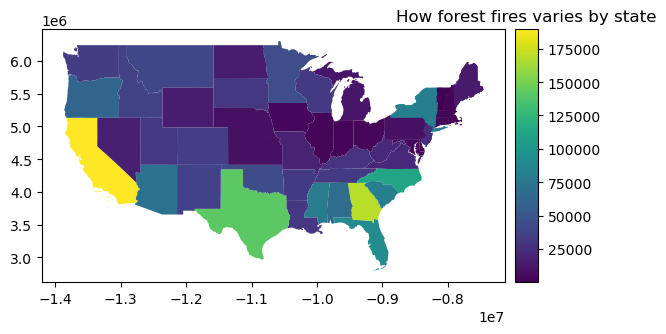

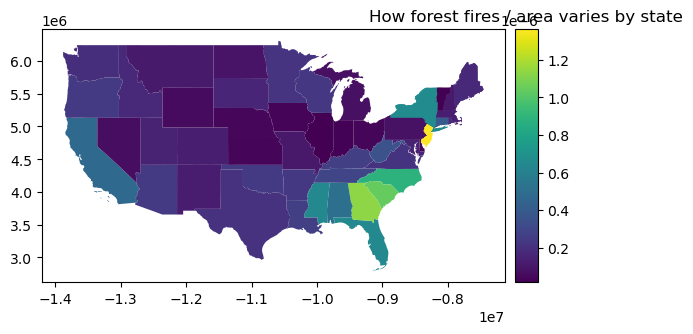

In [10]:
import pickle
with open("../../../../../a.p", "rb") as f:
    dc = pickle.load(f)

plot_on_US_map(lambda row: dc[row.STUSPS], 'forest fires')
plot_on_US_map(lambda row: dc[row.STUSPS] / row.ALAND, 'forest fires / area')

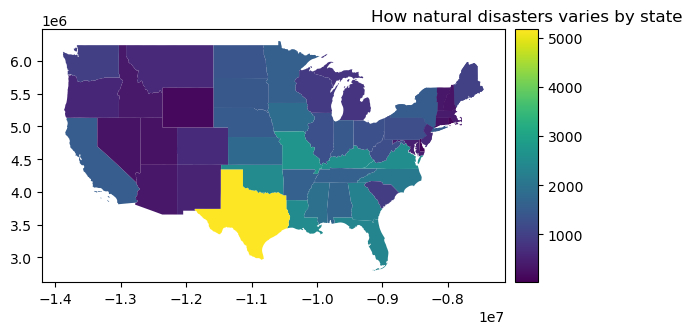

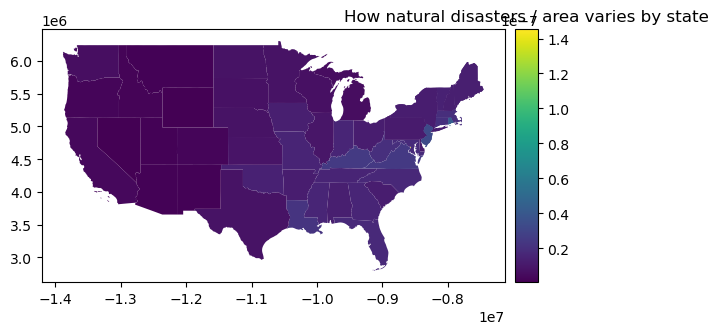

In [11]:
dis_df = pd.read_csv("us_disaster_declarations.csv")
dc = dis_df.groupby(['state']).count()['incident_type'].to_dict()

plot_on_US_map(lambda row: (dc[row.STUSPS]), 'natural disasters')
plot_on_US_map(lambda row: (dc[row.STUSPS]) / row.ALAND, 'natural disasters / area')


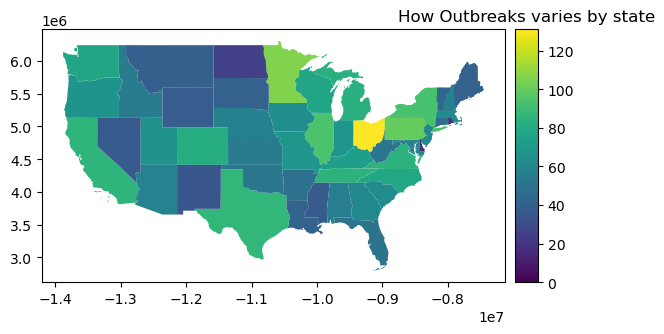

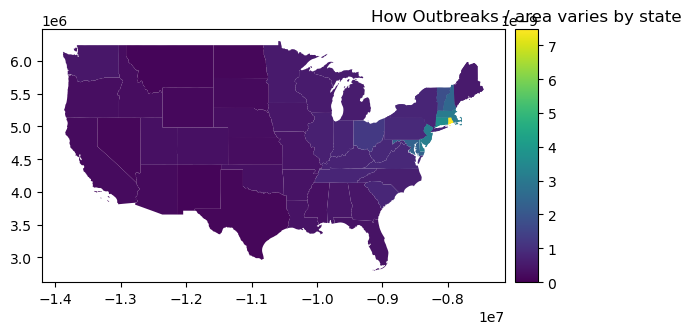

In [12]:
dc = {"Alabama" :55, "Alaska" :12, "Arizona" :58, "Arkansas" :49, "California" :85, "Colorado" :81, "Connecticut" :46, "Delaware" :16, "Florida" :50, "Georgia" :61, "Hawaii" :13, "Idaho" :54, "Illinois" :94, "Indiana" :69, "Iowa" :64, "Kansas" :54, "Kentucky" :73, "Louisiana" :41, "Maine" :41, "Maryland" :59, "Massachusetts" :62, "Michigan" :83, "Minnesota" :106, "Mississippi" :37, "Missouri" :69, "Montana" :39, "Nebraska" :57, "Nevada" :37, "New Hampshire" :57, "New Jersey" :61, "New Mexico" :35, "New York" :93, "North Carolina" :78, "North Dakota" :25, "Ohio" :131, "Oklahoma" :52, "Oregon" :68, "Pennsylvania" :100, "Puerto Rico" :4, "Rhode Island" :20, "South Carolina" :63, "South Dakota" :40, "Tennessee" :84, "Texas" :86, "Utah" :67, "Vermont" :43, "Virginia" :84, "Washington" :77, "Washington DC" :5, "West Virginia" :51, "Wisconsin" :77, "Wyoming" :38}
plot_on_US_map(lambda row: (dc[row.NAME]) if row.NAME in dc else 0, 'Outbreaks')
plot_on_US_map(lambda row: row.Outbreaks / row.ALAND, 'Outbreaks / area')

In [35]:
NY = STATES[STATES['STUSPS'] == 'NY']


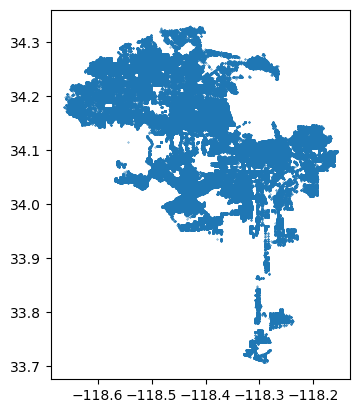

In [43]:
ny_trees = tree_df[tree_df['city'] == "Los Angeles"]
gdf = geopandas.GeoDataFrame(
    ny_trees, 
    geometry=geopandas.points_from_xy(ny_trees.longitude_coordinate, ny_trees.latitude_coordinate)
)
gdf_points = gdf[['geometry']]
# STATES = geopandas.read_file('./state_shape_data/usa-states-census-2014.shp')

gdf_points.plot(markersize = 0.1)
plt.show()

In [18]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
type(cities[cities['name'] == 'New York']['geometry'])

geopandas.geoseries.GeoSeries

In [34]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)
...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.21255 -33.87137)
241,Singapore,POINT (103.85387 1.29498)


In [42]:
tree_df['city'].value_counts()

Los Angeles    720140
New York       683788
San Jose       347669
Denver         284739
Portland       218602
                ...  
Lithonia            5
West Bend           3
Muskego             2
Lutz                1
Aiea                1
Name: city, Length: 126, dtype: int64